# Problem Statement
The goal is to build a model using logistic regression that could predict weather the salary is >50K or <50K.

# Data Dictionary
1. age: age
2. workclass: workclass
3. fnlwgt: final weight
4. education: highest education
5. educational-num: number of years of education
6. marital-status: marital status
7. occupation: Occupation
8. relationship: relationship
9. race: race
10. gender: gender
11. capital-gain: income from investment
12. capital-loss: income from investment
13. hours-per-week: number of working hours per week
14. native-country: native country
15. income: income

In [4]:
# loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [5]:
# uploading dataset
adult_data = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')

# Data Overview

In [6]:
# defining data overview function
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")

    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")

    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")

    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")

    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")

    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")

    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [7]:
data_overview(adult_data)

a glimpse of the data
----------------------------------------------------------------------------


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K




shape of the dataset
----------------------------------------------------------------------------


(48842, 15)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), objec

None



missing values
----------------------------------------------------------------------------


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 52


value counts for workclass
----------------------------------------------------------------------------
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


value counts for education
----------------------------------------------------------------------------
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int6

### Observations
1. Dataset has 48842 rows and 15 columns.
2. There are no missing values, however, some cells in data is represented by '?' which means there is bad data in the dataset which we will treat during pre-processing phase.
3. Dataset has 6 numeric and 9 object type columns.
4. In statistical summary, capital-gain and capital-loss have high range but 75% values for both are 0.
5. There are duplicates in the data, which we will drop during pre-processing phase.
6. income, which is the variable of interest has skewed data.

# Pre-processing Data
In the dataset, the columns "education" and "educational-num" provide similar information, with one indicating the highest education level attained and the other specifying the number of years of education. Therefore, we are removing the "educational-num" column. Likewise, the columns "marital-status" and "relationship" convey largely overlapping information, so we are deleting the "relationship" column in this case.

In [8]:
# dropping educational-num and relationship columns
adult_data_v1 = adult_data.drop(['educational-num', 'relationship'], axis = 1)
adult_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   race            48842 non-null  object
 7   gender          48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
 12  income          48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


### Deleting duplicates

In [9]:
adult_data_v1 = adult_data_v1.drop_duplicates().reset_index(drop = True)
adult_data_v1.shape

(48778, 13)

### Treating bad data
in the dataset columns 'workclass', 'occupation' and 'native-country' have '?' values for some cases and since, the number of values are high so we will replace them by 'Unknown'.

In [10]:
adult_data_v1 = adult_data_v1.replace('?', 'Unknown')
display(adult_data_v1['workclass'].value_counts())
print('\n')
display(adult_data_v1['occupation'].value_counts())
print('\n')
display(adult_data_v1['native-country'].value_counts())

workclass
Private             33849
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2794
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

occupation
Prof-specialty       6164
Craft-repair         6101
Exec-managerial      6081
Adm-clerical         5603
Sales                5500
Other-service        4917
Machine-op-inspct    3015
Unknown              2804
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

native-country
United-States                 43780
Mexico                          943
Unknown                         856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

# EDA
### Univariate Analysis
#### For numeric columns

In [11]:
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)

    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()


Skewness of age:  0.5563368855703027
Distribution of age
----------------------------------------------------------------------------


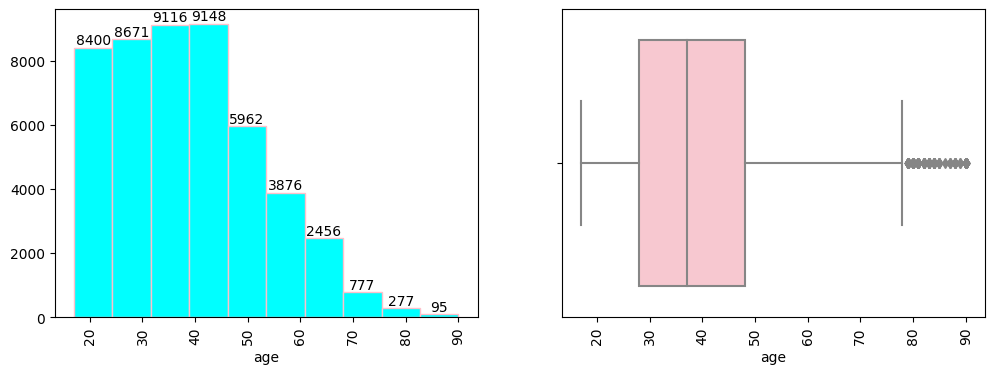

Skewness of fnlwgt:  1.439516835917064
Distribution of fnlwgt
----------------------------------------------------------------------------


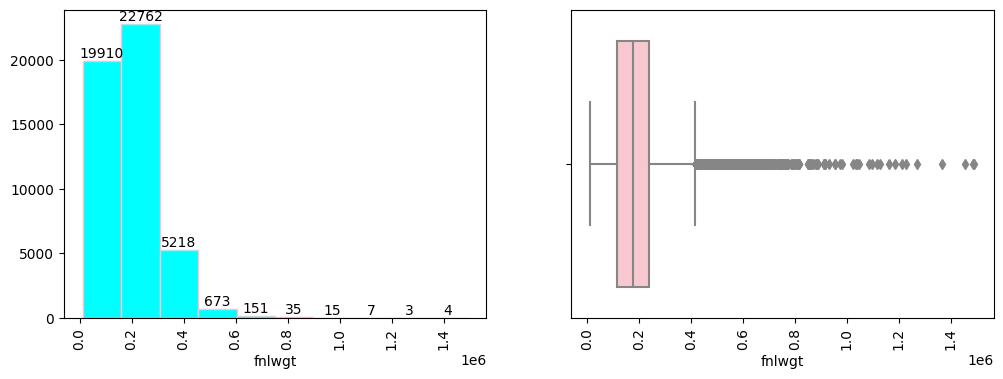

Skewness of capital-gain:  11.886788755496436
Distribution of capital-gain
----------------------------------------------------------------------------


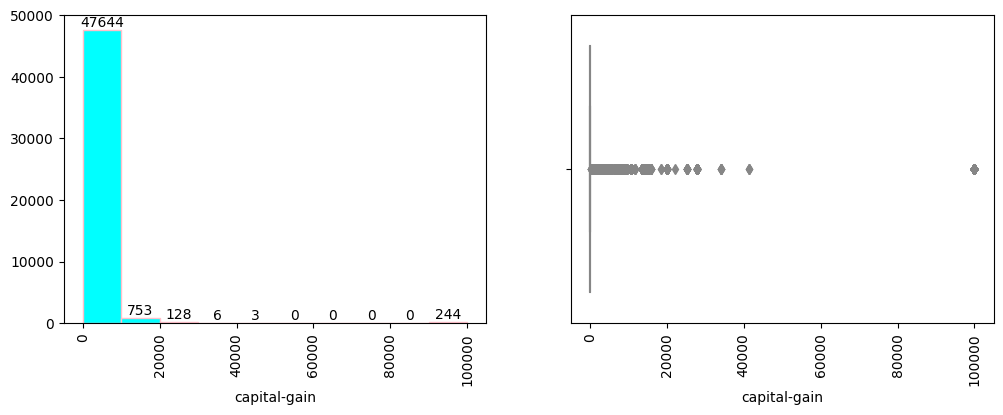

Skewness of capital-loss:  4.566397060893241
Distribution of capital-loss
----------------------------------------------------------------------------


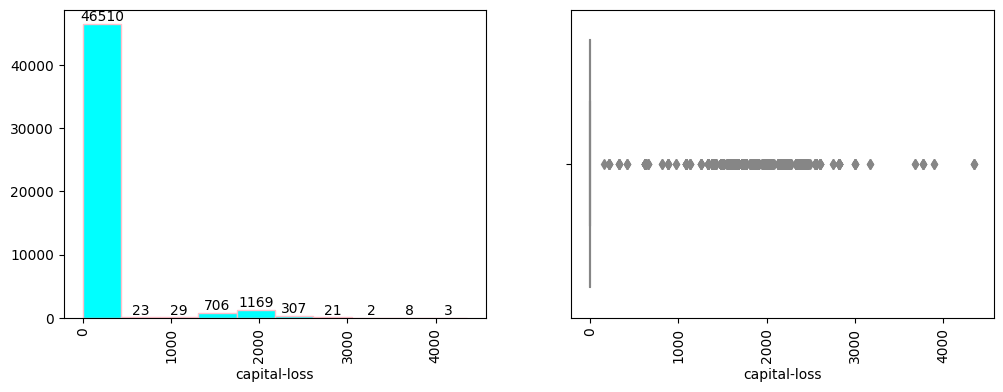

Skewness of hours-per-week:  0.2395860206079808
Distribution of hours-per-week
----------------------------------------------------------------------------


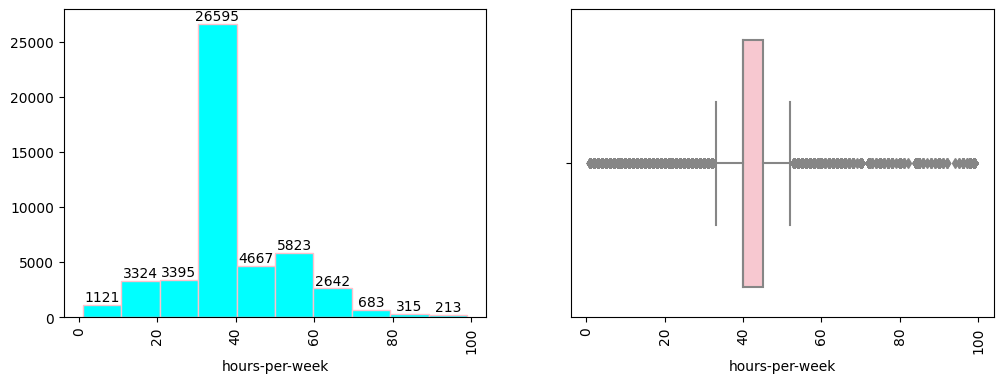

In [12]:
num_cols = adult_data_v1.select_dtypes(include = 'number').columns
for column in num_cols:
  univariateAnalysis_numeric(adult_data_v1, column)

#### Observations
1. For all the numeric columns there are multiple outliers, we will have to treat these outliers before applying the regression model as they can make the model biased.
2. For columns capital-gain and capital-loss data is highly skewed and there is significant number of outliers, however, from the statistical summary we know that atleast 75% values for these columns are 0. Due to this we will not treat outliers for these columns as outlier treatment could make these columns insignificant.

#### For categorical columns

In [13]:
def univariateAnalysis_category(df, cat_column):
    print("Distribution of " + cat_column)
    print("----------------------------------------------------------------")
    plt.figure()
    plt.figure(figsize=(8, 5))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

Distribution of workclass
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

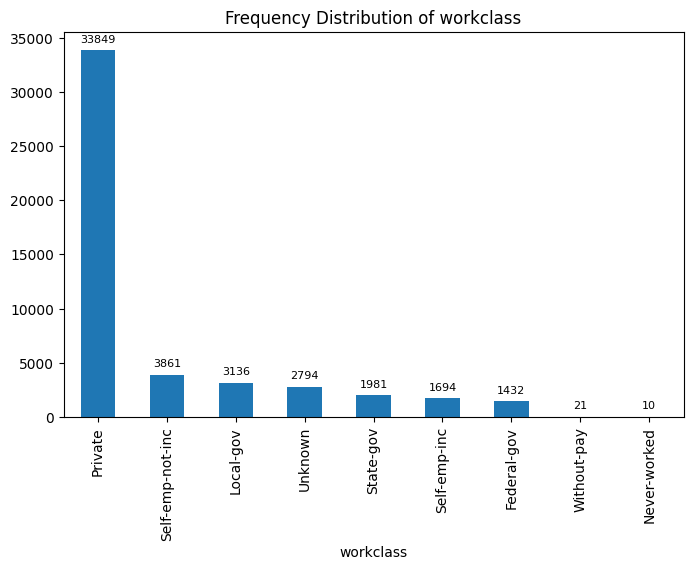

       
Distribution of education
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

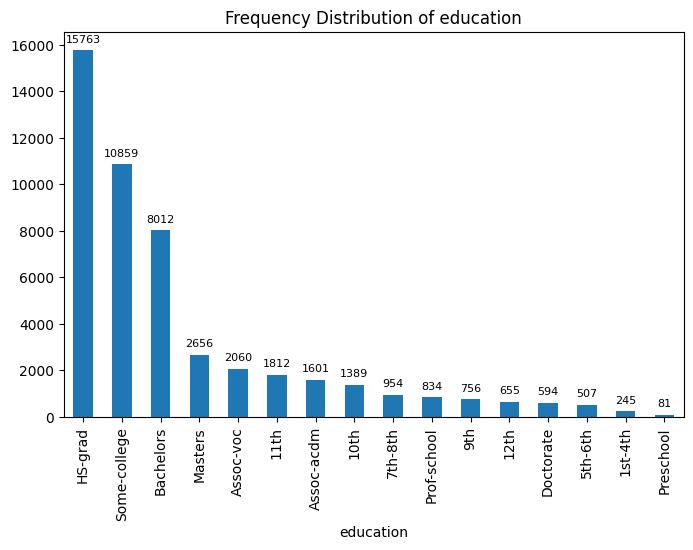

       
Distribution of marital-status
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

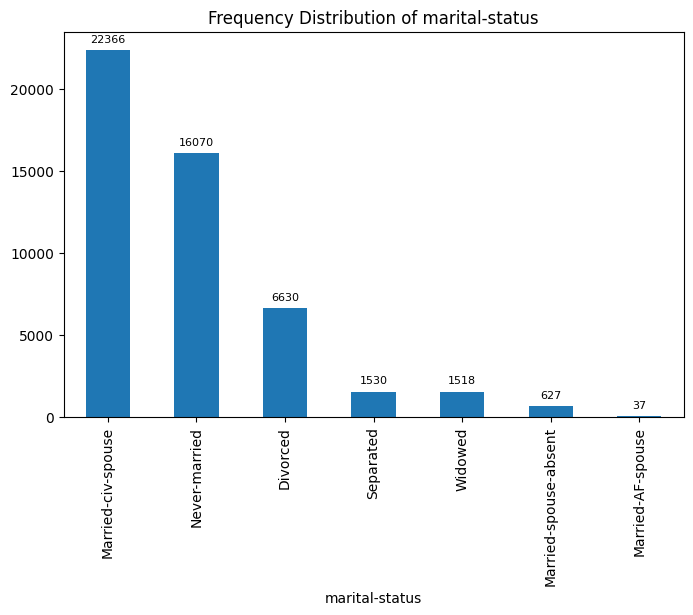

       
Distribution of occupation
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

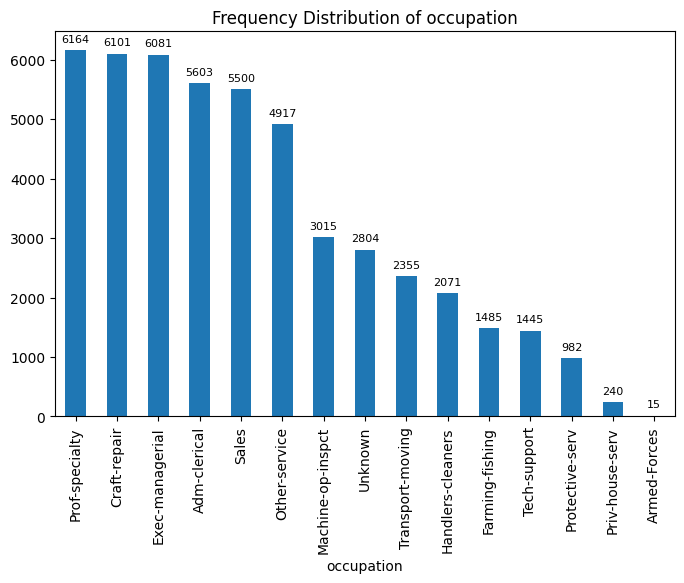

       
Distribution of race
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

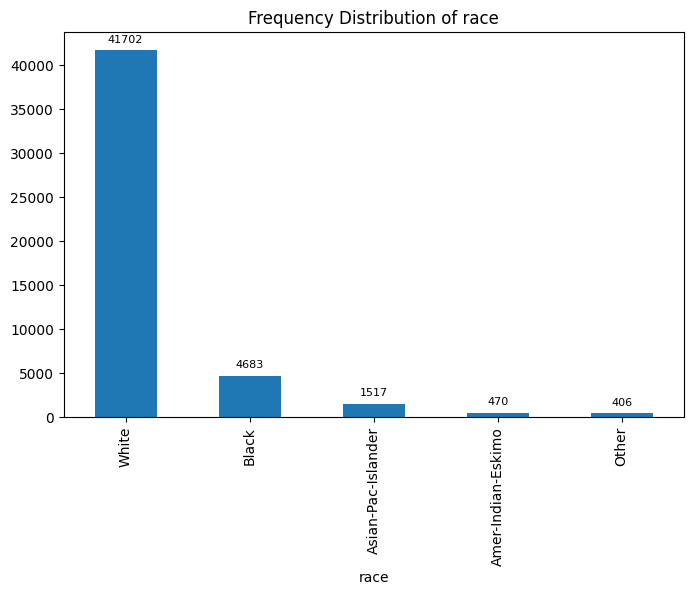

       
Distribution of gender
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

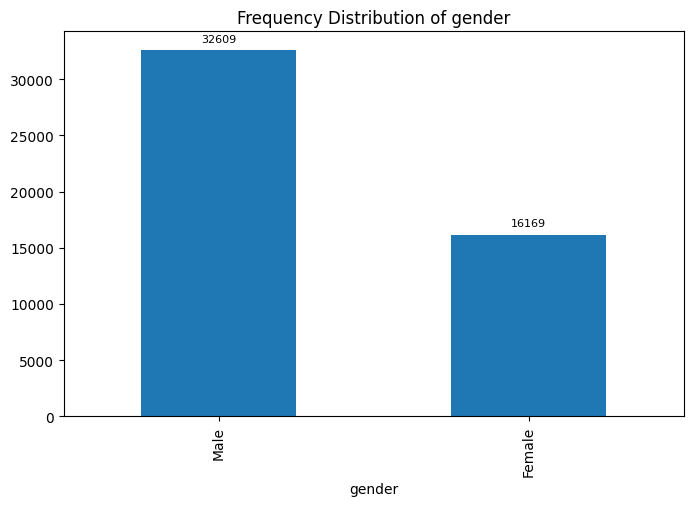

       
Distribution of native-country
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

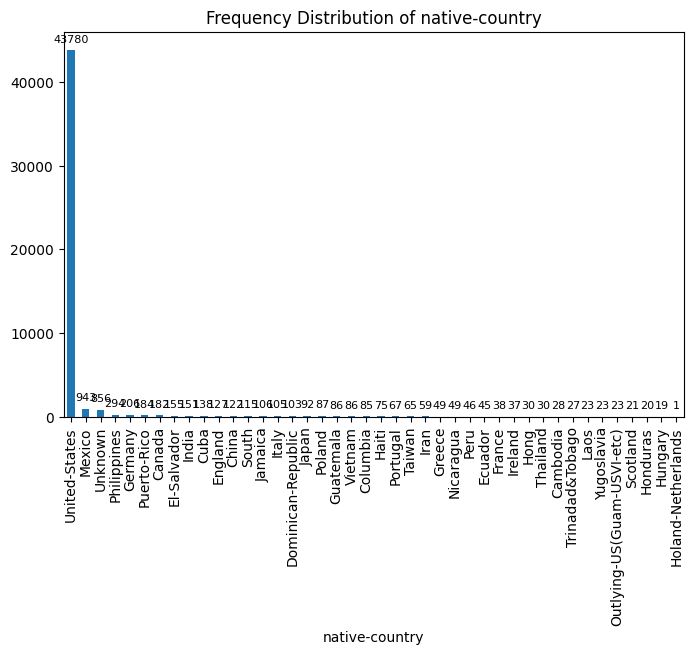

       
Distribution of income
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

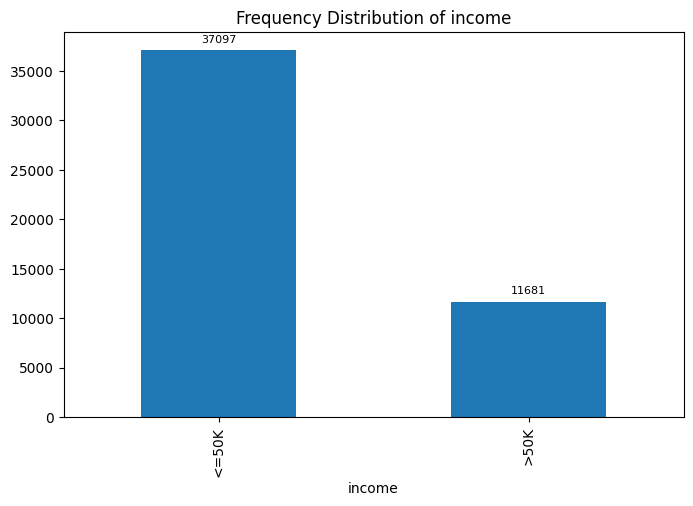

In [14]:
cat_cols = adult_data_v1.select_dtypes(include = 'object').columns
for col in cat_cols:
  univariateAnalysis_category(adult_data_v1, col)

### Bivariate Analysis
#### Checking for correlation


In [15]:
adult_data_num = adult_data_v1.select_dtypes(include = 'number')
def bivariate_num_num(df, df_num):
  # pairplot
  print('pair plot')
  sns.pairplot(data = df, diag_kind = 'kde', hue = 'income')
  plt.show()

  # heatmap
  print('heatmap')
  corr = df_num.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=np.bool_))
  fig = plt.subplots(figsize=(20, 10))
  sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
  plt.show()

pair plot


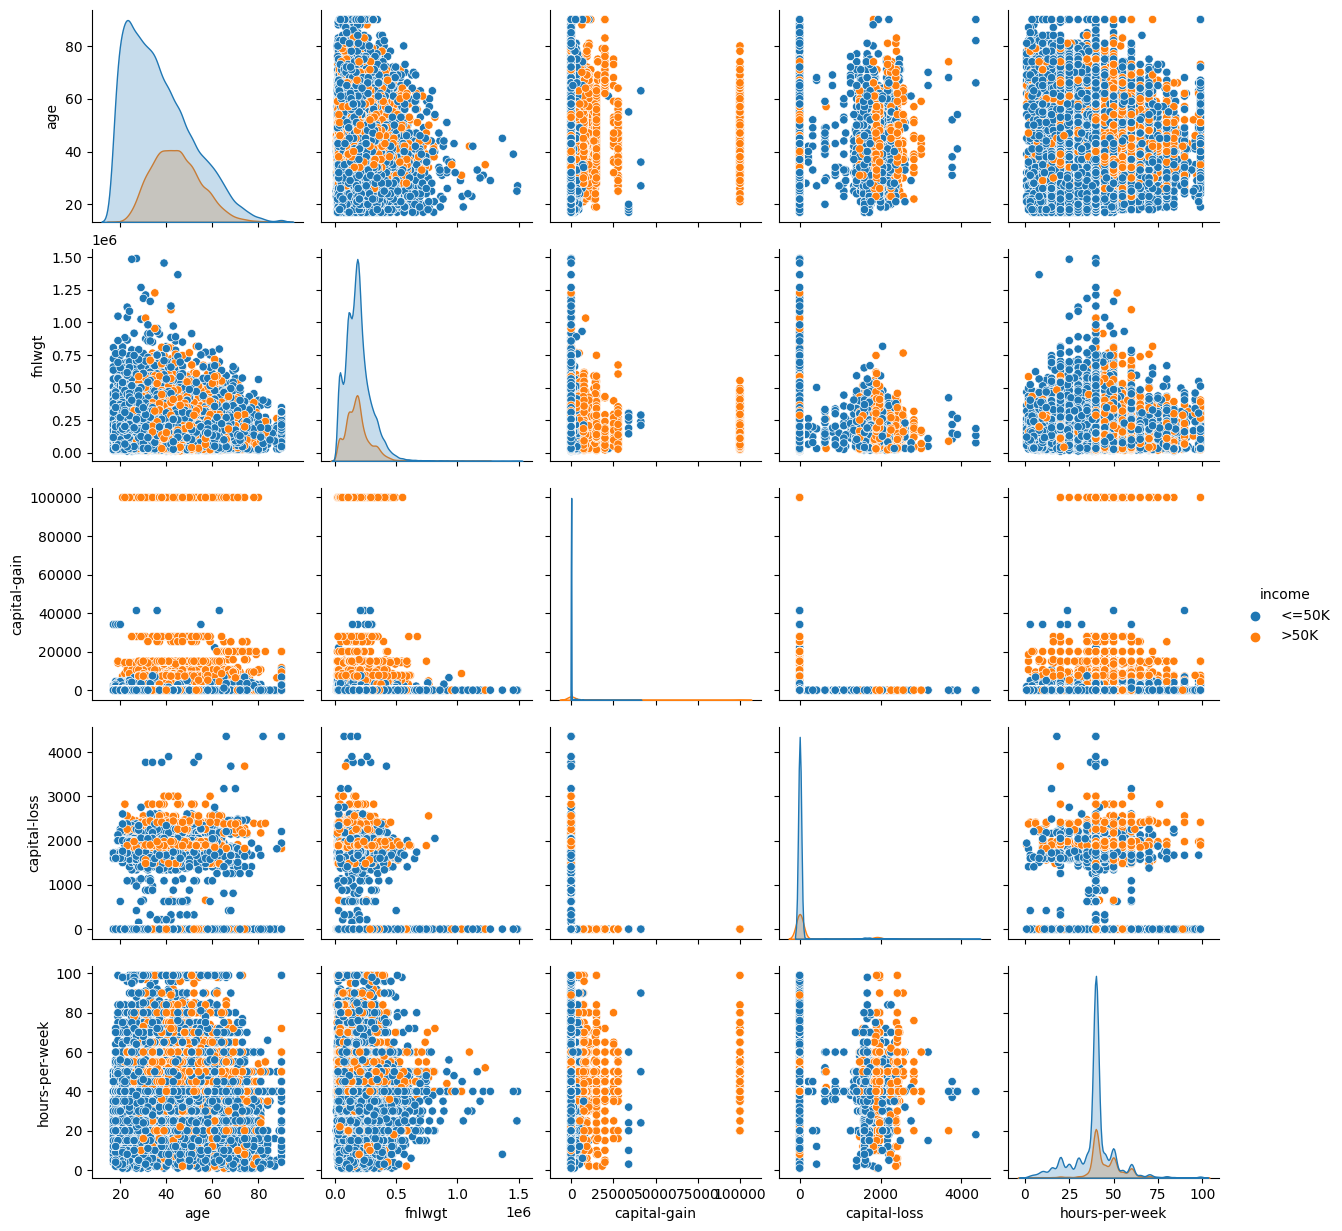

heatmap


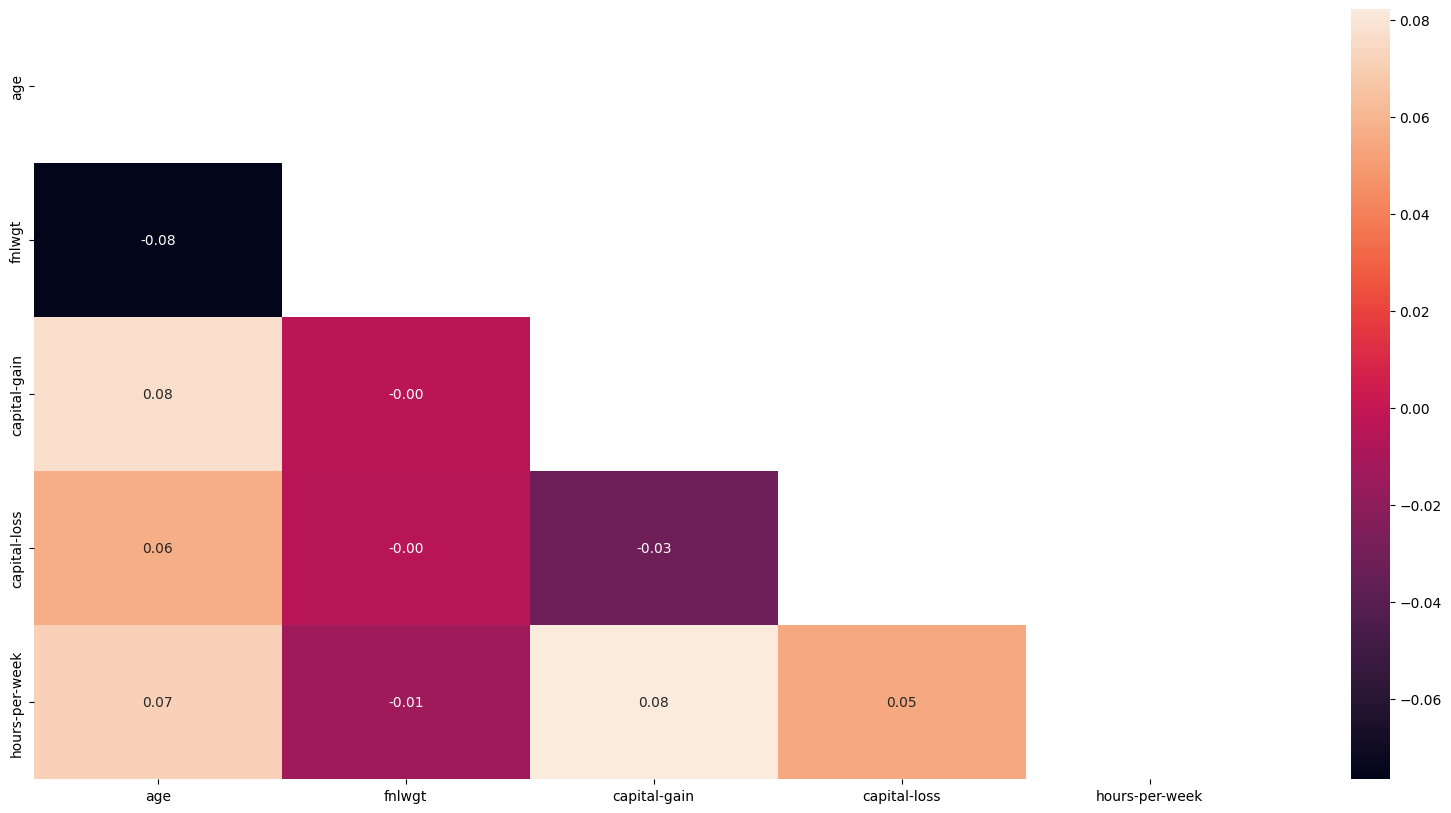

In [16]:
bivariate_num_num(adult_data_v1, adult_data_num)

#### Observations
1. In the pairplot, for diagonals the data tends to overlap for both income class meaning numeric columns might not be very good diffrentiators.
2. Most numeric column pairs show correlation in single digits meaning there is no collinearity in the data.

# Outlier treatment

In [17]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)



In [19]:
# creating a copy of the dataset
adult_data_v2 = adult_data_v1.copy()

In [20]:

for i in ['age', 'fnlwgt', 'hours-per-week']:
    adult_data_v2[i]=treat_outlier(adult_data_v2[i])


Text(0.5, 1.0, 'Outlier treated data')

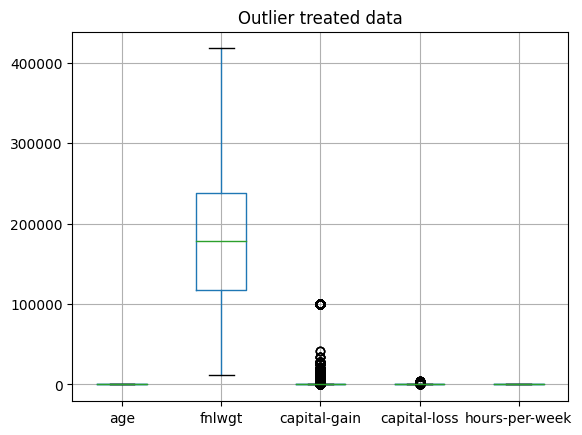

In [21]:
adult_data_v2.boxplot()
plt.title('Outlier treated data')

# Label encoding
### Converting all objects to categorical codes

In [22]:
# creating a copy of outlier treated dataset
adult_data_v3 = adult_data_v2.copy()

In [23]:
# Grouping certain types of 'workclass' together by creating new classes
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Local-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Federal-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'State-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Self-emp-not-inc', 'Self-emp', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Self-emp-inc', 'Self-emp', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Unknown', 'Others', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Without-pay', 'Others', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Never-worked', 'Others', adult_data_v3['workclass'])

In [24]:
# Grouping certain types of 'education' together and coding them in an ordinal manner
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Preschool', 1, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '1st-4th', 1, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '5th-6th', 2, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '7th-8th', 2, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '9th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '10th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '11th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '12th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'HS-grad', 4, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Assoc-acdm', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Some-college', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Assoc-voc', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Prof-school', 6, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Bachelors', 6, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Masters', 7, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Doctorate', 8, adult_data_v3['education'])

In [25]:
# Grouping certain types of 'marital-status' together by creating new categories
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Never-married', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Widowed', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Divorced', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Separated', 'CurrentlySingle', adult_data_v3['marital-status'])

adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-civ-spouse', 'Married', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-spouse-absent', 'Married', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-AF-spouse', 'Married', adult_data_v3['marital-status'])

In [26]:
# Grouping certain types of 'occupation' together by creating new categories
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Machine-op-inspct', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Farming-fishing', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Craft-repair', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Transport-moving', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Handlers-cleaners', 'Blue Collar', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Protective-serv', 'Security', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Armed-Forces', 'Security', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Prof-specialty', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Tech-support', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Sales', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Priv-house-serv', 'Services', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Adm-clerical', 'White Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Exec-managerial', 'White Collar', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Unknown', 'Others', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Other-service', 'Others', adult_data_v3['occupation'])

In [27]:
adult_data_v3.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,3,CurrentlySingle,Blue Collar,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814.0,4,Married,Blue Collar,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Government,336951.0,5,Married,Security,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323.0,5,Married,Blue Collar,Black,Male,7688,0,40.0,United-States,>50K
4,18.0,Others,103497.0,5,CurrentlySingle,Others,White,Female,0,0,32.5,United-States,<=50K


In [28]:
adult_data_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48778 entries, 0 to 48777
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48778 non-null  float64
 1   workclass       48778 non-null  object 
 2   fnlwgt          48778 non-null  float64
 3   education       48778 non-null  object 
 4   marital-status  48778 non-null  object 
 5   occupation      48778 non-null  object 
 6   race            48778 non-null  object 
 7   gender          48778 non-null  object 
 8   capital-gain    48778 non-null  int64  
 9   capital-loss    48778 non-null  int64  
 10  hours-per-week  48778 non-null  float64
 11  native-country  48778 non-null  object 
 12  income          48778 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.8+ MB


education columns has object data type but we have converted the data in it to numeric, so, we will convert it to int64.

In [29]:
adult_data_v3['education'] = adult_data_v3['education'].astype('int64')

In [30]:
adult_data_v3['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48778 entries, 0 to 48777
Series name: education
Non-Null Count  Dtype
--------------  -----
48778 non-null  int64
dtypes: int64(1)
memory usage: 381.2 KB


In [31]:
# converting 'income' column into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [32]:
adult_data_v3['income'] = LE.fit_transform(adult_data_v3['income'])

In [33]:
# converting other 'object' type variables into dummy variables
adult_data_v3 = pd.get_dummies(adult_data_v3, drop_first = True).astype('int64')
display(adult_data_v3.shape)
print('\n')
adult_data_v3.head()

(48778, 61)

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,workclass_Others,workclass_Private,workclass_Self-emp,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,3,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,4,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,5,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,5,7688,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,5,0,0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression
### Splitting train and test data

In [34]:
X = adult_data_v3.drop('income', axis = 1)
Y = adult_data_v3['income']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 11)

In [36]:
print('train data')
display(X_train.head())
print('\n test data')
display(X_test.head())

train data


,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_Others,workclass_Private,workclass_Self-emp,marital-status_Married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
8893,40,277256,6,0,2559,52,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11530,38,331374,3,0,0,52,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
9221,36,176900,5,0,0,32,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
14283,19,30597,4,0,0,35,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
42644,19,85690,4,0,0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0



 test data


,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_Others,workclass_Private,workclass_Self-emp,marital-status_Married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
1135,38,248694,5,0,0,36,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
30831,68,191288,2,0,0,32,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36225,20,39477,5,0,0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12264,43,224998,6,0,1977,40,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
22095,19,170720,3,0,0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
y_train.value_counts(1)

income
0    0.762974
1    0.237026
Name: proportion, dtype: float64

In [38]:
y_test.value_counts(1)

income
0    0.754818
1    0.245182
Name: proportion, dtype: float64

### Applying logistic regression model

In [62]:
model = LogisticRegression(solver = 'newton-cg', max_iter = 100000, penalty = 'none', verbose = True, n_jobs = 2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=100000, n_jobs=2, penalty='none',
                   solver='newton-cg', verbose=True)

In [63]:
ytrain_predict = model.predict(X_train)

In [64]:
# getting model score
trainModel_score = model.score(X_train, y_train)
print('accuracy score for train data: ',trainModel_score)

accuracy score for train data:  0.8488460637300843


#### predicting using model

In [65]:
ytest_predict = model.predict(X_test)

In [66]:
# model score for test data
testModel_score = model.score(X_test, y_test)
print('accuracy score for test data: ', testModel_score)

accuracy score for test data:  0.8447451141178078


For test and train data, model has almost similar accuracy scores, this means that model is performing well. There is no issue of overfitting or underfitting. However, the income data is skewed, due to which accuracy is not a very good score for evaluation rather f1-score will be a better metric for which we will use metrics classification report.

In [67]:
# metrics classification report
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11046
           1       0.74      0.57      0.64      3588

    accuracy                           0.84     14634
   macro avg       0.80      0.75      0.77     14634
weighted avg       0.84      0.84      0.84     14634



### Model Evaluation
#### Using AUC and ROC

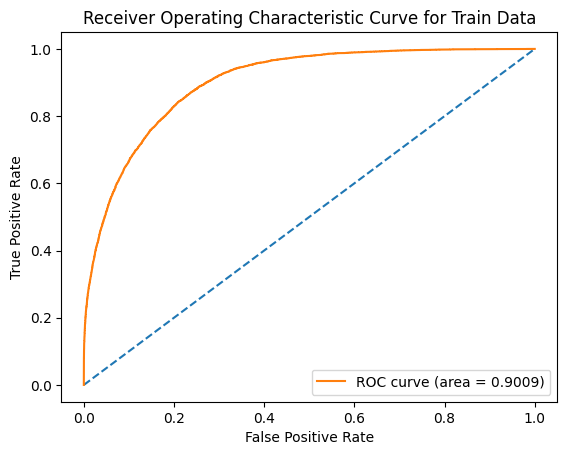

In [68]:
# for training data
# predicting probability
probs_train = model.predict_proba(X_train)
probs_train = probs_train[:,1]

# calculating AUC
auc_train = roc_auc_score(y_train, probs_train)

# plotting the curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, probs_train)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(train_fpr, train_tpr, label=f'ROC curve (area = {auc_train:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Train Data')
plt.legend(loc='lower right')
plt.show()

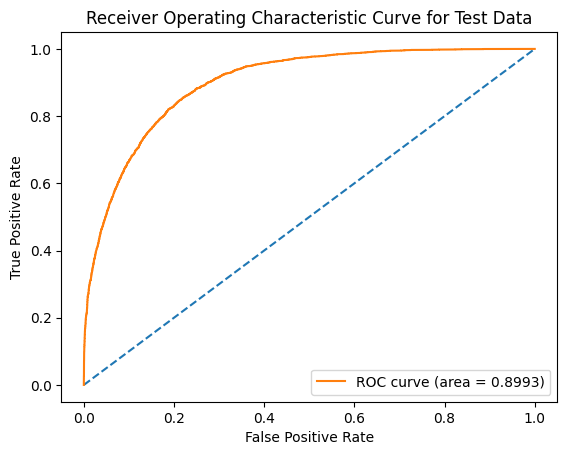

In [69]:
# for test data
# predicting probability
probs_test = model.predict_proba(X_test)
probs_test = probs_test[:,1]

# calculating AUC
auc_test = roc_auc_score(y_test, probs_test)

# plotting the curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, probs_test)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(test_fpr, test_tpr, label=f'ROC curve (area = {auc_test:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Test Data')
plt.legend(loc='lower right')
plt.show()

1. The AUC score for model is almost identical for both test and train data meaning that the model is stable.
2. The AUC score is almost 0.90 meaning that model is providing good measure of seprability.

#### Using confusion matrix

for train data
--------------------------------------------------------------------


array([[24292,  1759],
       [ 3402,  4691]])

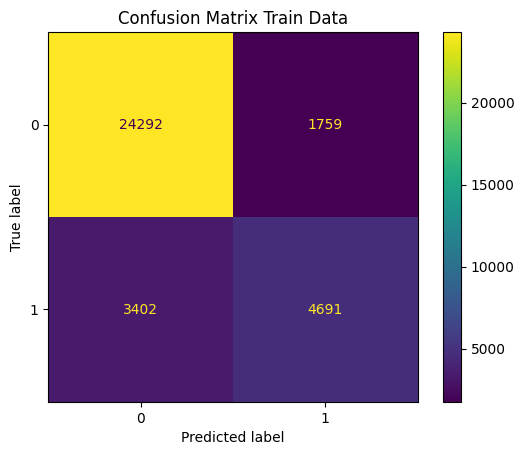



Classification report train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     26051
           1       0.73      0.58      0.65      8093

    accuracy                           0.85     34144
   macro avg       0.80      0.76      0.77     34144
weighted avg       0.84      0.85      0.84     34144



In [70]:
print('for train data')
print('--------------------------------------------------------------------')
cm_train = metrics.confusion_matrix(y_train, ytrain_predict)
display(cm_train)
print('\n')

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix Train Data')
plt.show()
print('\n')

# display classification report
print('Classification report train data')
print('--------------------------------------------------------------------')
print(metrics.classification_report(y_train, ytrain_predict))


for test data
--------------------------------------------------------------------


array([[10306,   740],
       [ 1532,  2056]])

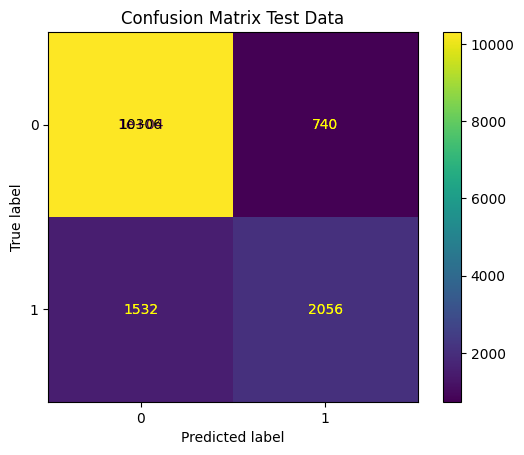



Classification report test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11046
           1       0.74      0.57      0.64      3588

    accuracy                           0.84     14634
   macro avg       0.80      0.75      0.77     14634
weighted avg       0.84      0.84      0.84     14634



In [71]:
print('for test data')
print('--------------------------------------------------------------------')
cm_test = metrics.confusion_matrix(y_test, ytest_predict)
display(cm_test)
print('\n')

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.title('Confusion Matrix Test Data')

for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 ha='center', va='center',
                 color='black' if cm_test[i, j] > cm_test.max() / 2 else 'yellow')

plt.show()
print('\n')

# display classification report
print('Classification report test data')
print('--------------------------------------------------------------------')
print(metrics.classification_report(y_test, ytest_predict))

While the model has performed well when evaluated using ROC-AUC and achieved an accuracy score of over 0.84, its F1-score for the label '1' of the dependent variable ('income') is only 0.64. This is mainly due to the overlap of both labels in the pair plot diagonals, which resulted in weak predictors for classifying income. To improve our classification, we need additional predictors where the income labels do not overlap.
# Applying GridSearchCV
We will try using GridSearchCV to improve model performance.

taking penalty as 'l1' and 'l2'

In [72]:
grid = {'penalty':['l2', 'l1'],
        'solver': ['saga', 'liblinear'],
        'tol': [0.0001, 0.00001]}

In [73]:
GS_model = LogisticRegression(max_iter = 100000, n_jobs = 2)
grid_search = GridSearchCV(estimator = GS_model, param_grid = grid, cv = 3, n_jobs=2, scoring='f1')

In [75]:
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=2,
             param_grid={'penalty': ['l2', 'l1'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [76]:
# details of the best model identified by Grid Search CV
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-05)


In [77]:
# defining the best model
best_model = grid_search.best_estimator_

In [78]:
# predicting on training and test set
ytrain_predict_gs = best_model.predict(X_train)
ytest_predict_gs = best_model.predict(X_test)

#### Model Evaluation

for train data
--------------------------------------------------------------------


array([[24309,  1742],
       [ 3406,  4687]])

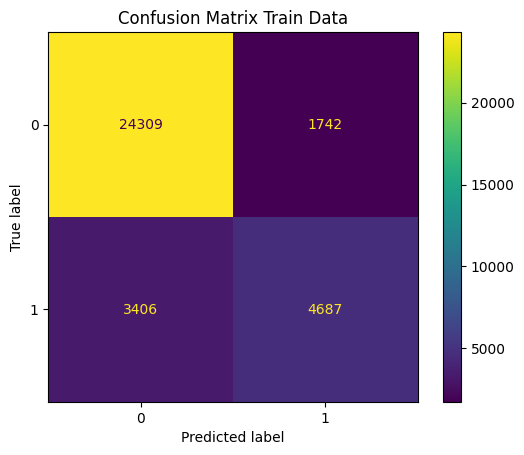



Classification report train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     26051
           1       0.73      0.58      0.65      8093

    accuracy                           0.85     34144
   macro avg       0.80      0.76      0.77     34144
weighted avg       0.84      0.85      0.84     34144



In [79]:
print('for train data')
print('--------------------------------------------------------------------')
cm_train = metrics.confusion_matrix(y_train, ytrain_predict_gs)
display(cm_train)
print('\n')

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix Train Data')
plt.show()
print('\n')

# display classification report
print('Classification report train data')
print('--------------------------------------------------------------------')
print(metrics.classification_report(y_train, ytrain_predict_gs))


for test data
--------------------------------------------------------------------


array([[10307,   739],
       [ 1540,  2048]])

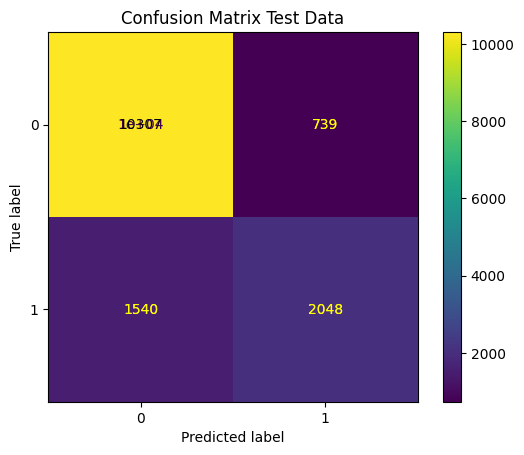



Classification report test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11046
           1       0.73      0.57      0.64      3588

    accuracy                           0.84     14634
   macro avg       0.80      0.75      0.77     14634
weighted avg       0.84      0.84      0.84     14634



In [80]:
print('for test data')
print('--------------------------------------------------------------------')
cm_test = metrics.confusion_matrix(y_test, ytest_predict_gs)
display(cm_test)
print('\n')

# plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.title('Confusion Matrix Test Data')

for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 ha='center', va='center',
                 color='black' if cm_test[i, j] > cm_test.max() / 2 else 'yellow')

plt.show()
print('\n')

# display classification report
print('Classification report test data')
print('--------------------------------------------------------------------')
print(metrics.classification_report(y_test, ytest_predict_gs))

In [81]:
best_model.score(X_test, y_test)

0.8442667760010933

Model based on GridSearchCV also has similar performance to the original model.